# 1.Importing Required Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 2.Loading the Dataset

In [25]:
column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_of_doors", "body_style", "drive_wheels", "engine_location",
    "wheel_base", "length", "width", "height", "curb_weight",
    "engine_type", "num_of_cylinders", "engine_size", "fuel_system",
    "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
    "city_mpg", "highway_mpg", "price"
]

# Load CSV (replace 'auto_imports.csv' with your path)
data = pd.read_csv("auto_imports.csv", names=column_names, header=None)
data


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# 3.Data Cleaning and Missing Value Treatment

In [26]:

data.replace("?", np.nan, inplace=True)

# Convert numeric columns
num_cols = ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"]
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing numerical values with mean
for col in ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm"]:
    data.loc[:, col] = data[col].fillna(data[col].mean())

# Fill missing categorical values
data.loc[:, 'num_of_doors'] = data['num_of_doors'].fillna(data['num_of_doors'].mode()[0])

# Drop rows with missing target value
data = data.dropna(subset=['price'])


# 4.Exploratory Data Analysis (EDA)

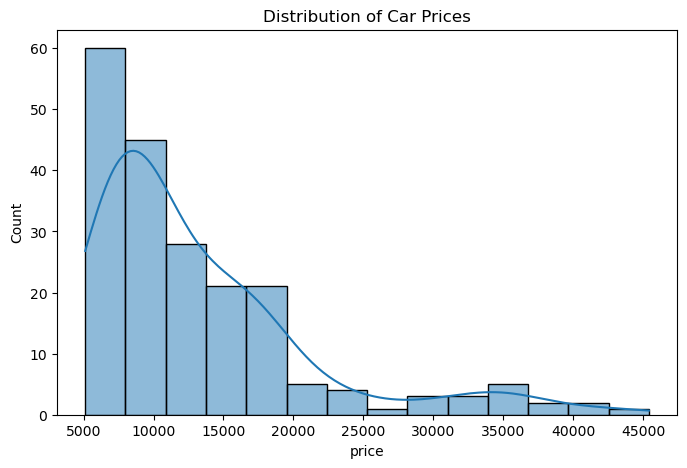

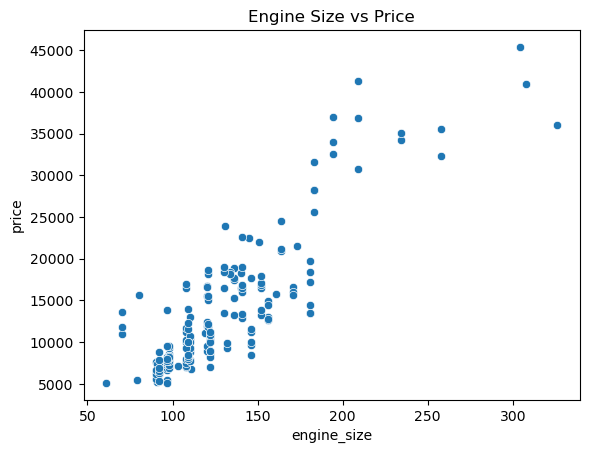

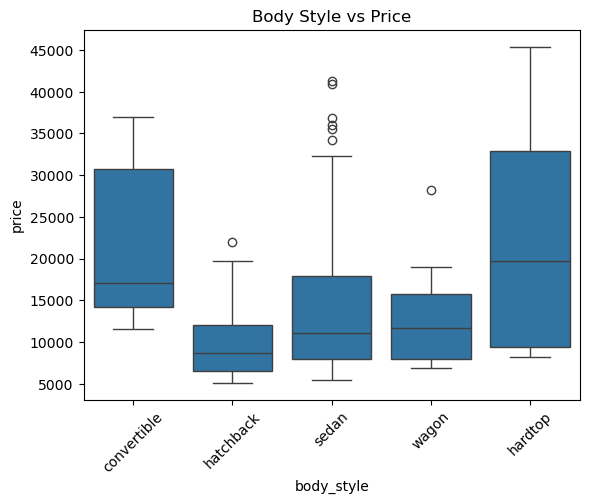

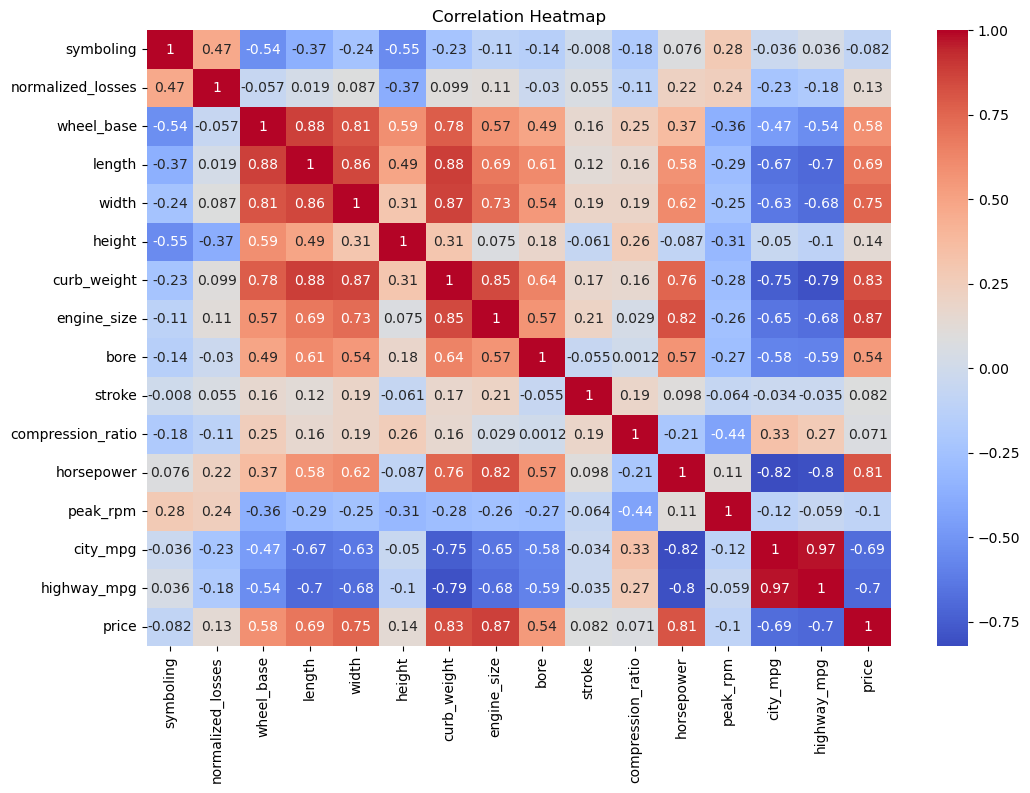

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(data["price"], kde=True)
plt.title("Distribution of Car Prices")
plt.show()

sns.scatterplot(x="engine_size", y="price", data=data)
plt.title("Engine Size vs Price")
plt.show()

sns.boxplot(x="body_style", y="price", data=data)
plt.title("Body Style vs Price")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 5.Encoding Categorical Features & Feature Selection

In [28]:
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop("price", axis=1)
y = data_encoded["price"]
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop("price", axis=1)
y = data_encoded["price"]


# 6.Train-Test Split and Feature Scaling

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 7.Linear Regression Model - Training & Evaluation

In [30]:

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MAE: 842221937060256.0
R2 Score: -2.3770834905549287e+23


# 8.Random Forest Model - Training & Evaluation

In [31]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))



Random Forest Results:
MAE: 1869.1489024390246
R2 Score: 0.9312307287070296


# 9.Feature Importance from Random Forest

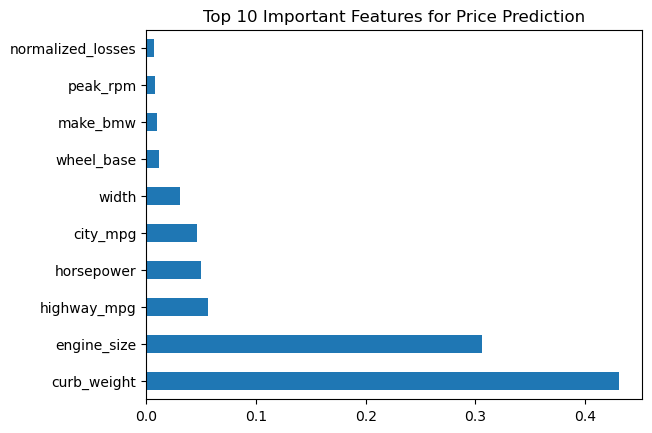

In [32]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features for Price Prediction")
plt.show()


# 10.Summary & Insights

In [33]:
print("✅ Summary:")
print("- Engine Size, Curb Weight, and Horsepower strongly influence price.")
print("- Random Forest outperformed Linear Regression in accuracy.")
print("- Brands like BMW, Mercedes, and Audi are associated with high price tags.")
print("- Price can be strategically controlled by adjusting design features.")


✅ Summary:
- Engine Size, Curb Weight, and Horsepower strongly influence price.
- Random Forest outperformed Linear Regression in accuracy.
- Brands like BMW, Mercedes, and Audi are associated with high price tags.
- Price can be strategically controlled by adjusting design features.
